# Real Estate Market Dependencies Analysis

**Data and Their Source**

The dataset is provided in a CSV file. It contains an archive of real estate Marketplace listings spanning several years, featuring apartment sales in St. Petersburg and surrounding areas.

For each apartment on sale, two types of data are available. The first set of data is provided by the user, and the second set is automatically obtained based on map data.

**Data Description**
- airports_nearest — distance to the nearest airport in meters (m)
- balcony — number of balconies
- ceiling_height — ceiling height in meters (m)
- cityCenters_nearest — distance to the city center in meters (m)
- days_exposition — number of days the listing was posted (from publication to removal)
- first_day_exposition — publication date
- floor — floor number
- floors_total — total number of floors in the building
- is_apartment — apartment status (boolean type)
- kitchen_area — kitchen area in square meters (m²)
- last_price — price at the time of delisting
- living_area — living area in square meters (m²)
- locality_name — name of the locality
- open_plan — open floor plan (boolean type)
- parks_around3000 — number of parks within a 3 km radius
- parks_nearest — distance to the nearest park in meters (m)
- ponds_around3000 — number of ponds within a 3 km radius
- ponds_nearest — distance to the nearest pond in meters (m)
- rooms — number of rooms
- studio — studio apartment (boolean type)
- total_area — total area of the apartment in square meters (m²)
- total_images — number of images of the apartment in the listing

**Task**
* [x] Perform data preprocessing and explore the dataset.
* [x] Identify features and dependencies that characterize the real estate market.

**Research Plan**
1. Data Overview
2. Data Preprocessing
3. Data Enrichment
4. Exploratory Data Analysis
5. Conclusion

In [1]:
# All libraries used in this project are listed here
import matplotlib.pyplot as plt
import pandas as pd

## Data Overview 

In [2]:
try:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://.../datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The table contains 22 columns. The data types in most columns are float (14 columns), with 3 columns each of int64 and object types, and 2 columns of boolean type (bool).

There are missing values in the data.

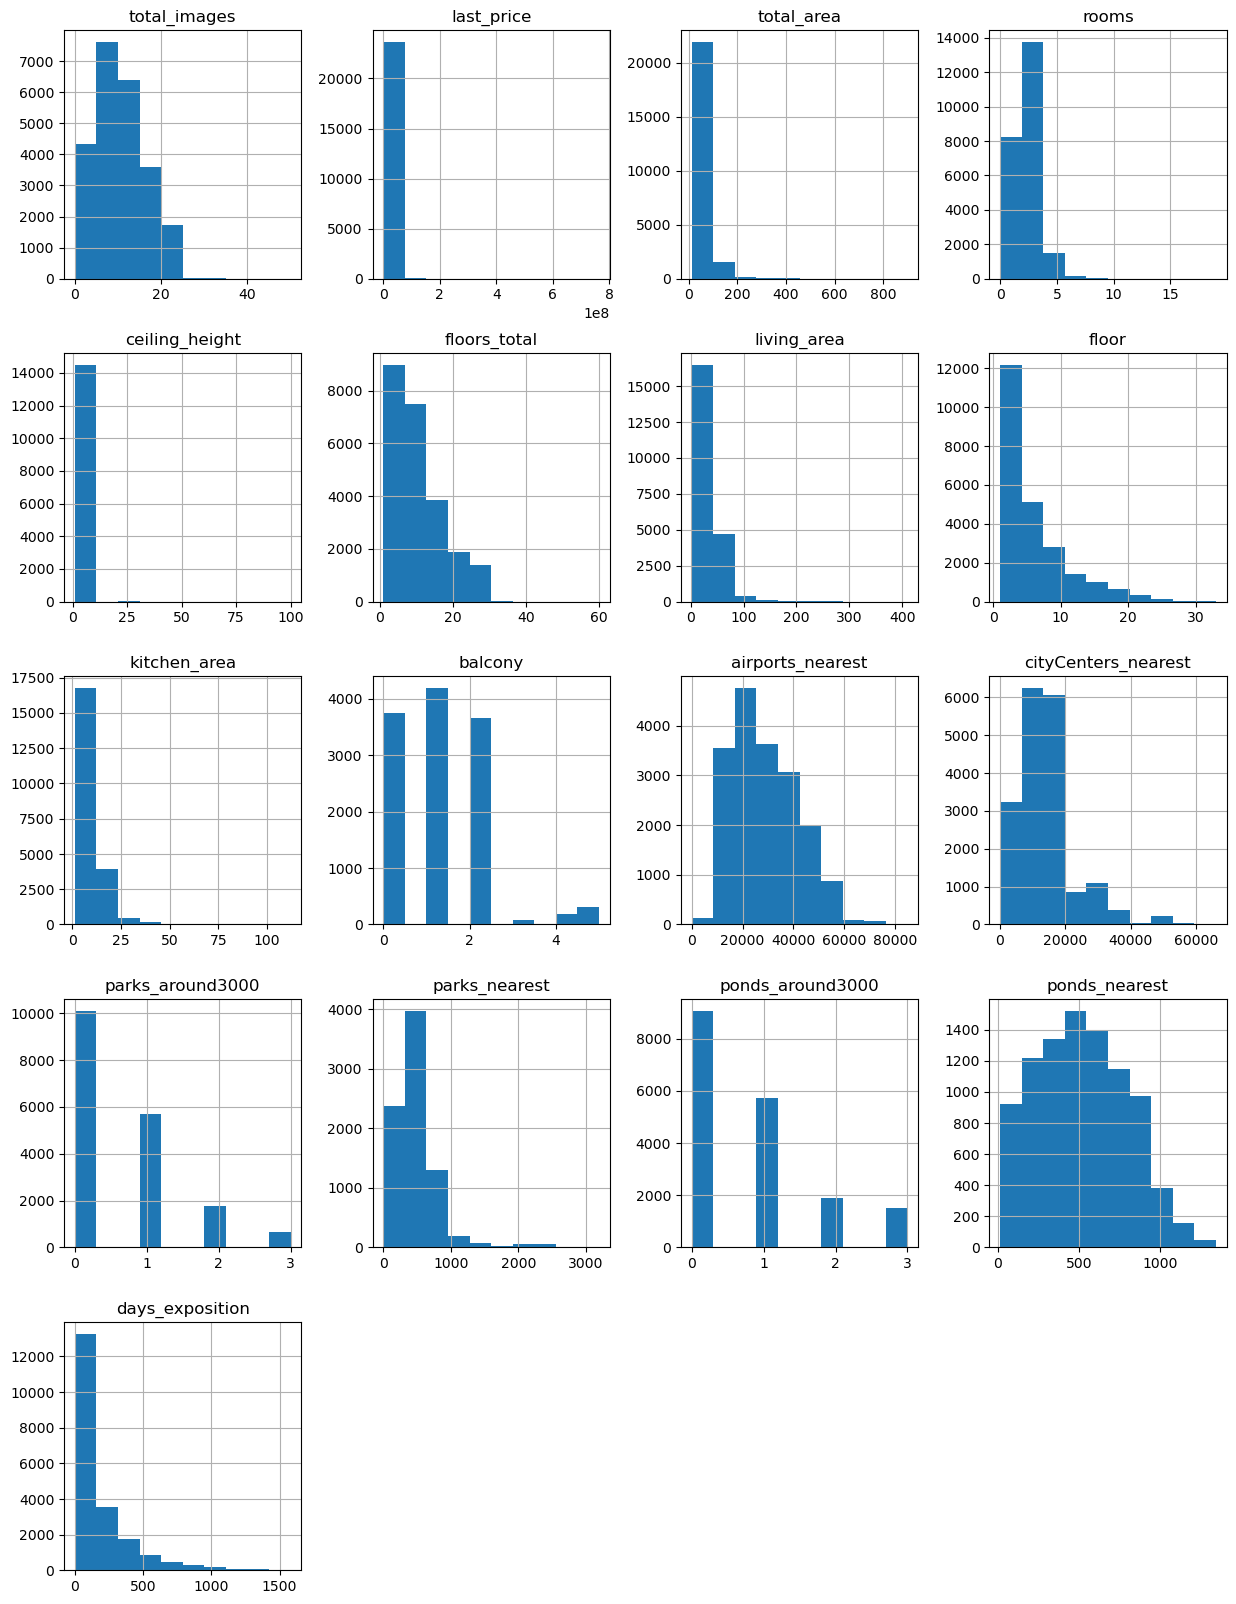

In [4]:
df.hist(figsize=(15, 20))
plt.show()

- total_images — most listings have around 10 photos.
- last_price — the price at the time of delisting is around 4-5 million.
- total_area — the total area of the apartment in most listings is less than 100 m².
- rooms — primarily 2-3 rooms; check for any listings with 0 rooms and address them if present.
- ceiling_height — the histogram shows anomalous values around 25 meters; needs verification.
- floors_total — mostly less than 10 floors in the building.
- living_area — the living area in most listings is less than 50 m².
- floor — primarily up to the 5th floor.
- kitchen_area — the kitchen area is mostly less than 10 m².
- balcony — the number of balconies is typically 1-2, but there are some listings with more than 4; needs verification.
- airports_nearest — the distance to the nearest airport is mostly 20 km or more.
- cityCenters_nearest — most apartments are within 20 km of the city center.
- parks_nearest and ponds_nearest — the distance to the nearest park and/or pond is mostly around 500 meters where data is available.
- days_exposition — most listings are posted for up to a year (from publication to removal).

## Data Preprocessing

In [5]:
# Let's see which columns have the most missing values. We'll create a technical variable "a" for easier visualization. 
a = pd.DataFrame(df.isna().sum())
a.columns = ['is_null']
a['share_null'] = a['is_null'] / df.shape[0] * 100
a.query('is_null > 0').sort_values('share_null', ascending=False)

,is_null,share_null
is_apartment,20924,88.290645
parks_nearest,15620,65.909954
ponds_nearest,14589,61.559559
balcony,11519,48.605426
ceiling_height,9195,38.799105
airports_nearest,5542,23.384953
cityCenters_nearest,5519,23.287902
parks_around3000,5518,23.283683
ponds_around3000,5518,23.283683
days_exposition,3181,13.422507


- **is_apartment** - has the highest number of missing values (88%). Since the data assumes values "1" for apartments and "0" for non-apartments, it can be assumed that empty values mean "0". People might mark the property as an apartment if applicable and leave the field empty if not. Therefore, it makes sense to fill in the missing values with **"0"**.
- **parks_nearest** - more than 50% of values are missing. It is likely that there are no parks nearby, or the distance to them is unknown. Property owners might have left these fields empty for this reason. It is not appropriate to fill in the missing values with "0", mean, or median. It is better to leave these values **empty**.
- **ponds_nearest** - more than 50% of values are also missing. Similar to parks, it is better to leave these values **empty** as their absence might indicate no pond nearby or lack of information.
- **balcony** - it is logical to assume that in the absence of a balcony, the respondent left the field empty. Therefore, it makes sense to fill in the missing values with **"0"**.
- **ceiling_height** - ceilings cannot be absent, but respondents might not have information about their height. It is possible that people skipped this "difficult" question or considered the information insignificant. We will fill in the missing values with the **mean** after removing outliers.
- **airports_nearest** - similar to parks and ponds, we will leave these values **empty**.
- **cityCenters_nearest** - the reason for missing values might be the respondent's lack of information or insufficient precision for automatic geolocation determination. Nevertheless, all properties are somewhat distant from the center. We will fill in the missing values with the **median** to balance the potential influence of very close and very far properties relative to the center.
- **parks_around3000** - the reason for missing values might be that there is no park within 3000 meters, and respondents left the field empty for this reason. Therefore, it makes sense to fill in the missing values with **"0"**.
- **ponds_around3000** - similar to the situation with parks, it makes sense to fill in the missing values with **"0"**.
- **days_exposition** - there are no missing values in the "last_price" column, indicating the price at the time of delisting. This suggests that all listings were removed, but information about the number of days listed might be missing for technical reasons. We will fill in the missing values with the **median** to balance the influence of large and rare values (long right tail on the histogram).
- **kitchen_area** - the reason for missing values might be both technical and human factors. We will fill in the missing values with the **median**, considering the long right tail visible on the histogram.
- **living_area** - the reason for missing values might be both technical and human factors. We will fill in the missing values with the **median** to balance the influence of apartments with an area of 100-200 square meters.
- **floors_total** - the reason for missing values might be both technical and human factors. We will fill in the missing values with the **median**.
- **locality_name**	- the reason for missing values might be both technical and data entry errors. The locality name is an important aspect for analysis. Since the proportion of missing data is minor (0.2%), I suggest removing the rows with missing values in this column from the dataframe.

In [6]:
# We will handle the missing values by filling them with "0" and change the data type to int,
# integers are sufficient for the purposes of these columns.
df['is_apartment'] = df['is_apartment'].fillna(0).astype('int')

In [7]:
# We will fill the missing values with "0" and change the data type to int,
# as the number of balconies should be an integer.
df['balcony'] = df['balcony'].fillna(0).astype('int')

In [8]:
# We will fill the missing values with "0" and change the data type to int,
# as the number of parks should be an integer.
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')

In [9]:
# Similarly, we will fill the missing values with "0" and change the data type to int.
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')

In [10]:
# We will fill the missing values in kitchen_area and living_area with medians. However, we will use the medians
# of groups based on the number of rooms. For example, a missing value in a one-room apartment will be filled
# with the median for one-room apartments. First, let's look at the unique values in the rooms column.
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12],
      dtype=int64)

In [11]:
# Apartments cannot have 0 rooms. This likely refers to studios where the room is combined with the kitchen.
# We will consider all such cases as one-room apartments. Let's change 0 to 1.
df['rooms'] = df['rooms'].replace(0, 1)

In [12]:
# We will check the apartments with a large number of rooms to see if there are any errors in the room count. We will
# calculate the average area of one room based on the average total area, grouping the listings by the rooms column.
a = df.groupby('rooms')['total_area'].agg(['count', 'mean'])
a['area_1_room'] = a['mean']/a.index
a

,count,mean,area_1_room
rooms,,,
1,8244,37.444779,37.444779
2,7940,55.855089,27.927545
3,5814,77.764580,25.921527
4,1180,107.610763,26.902691
5,326,161.474816,32.294963
6,105,201.537619,33.589603
7,59,265.325424,37.903632
8,12,259.233333,32.404167
9,8,305.975000,33.997222


The average room area in "multi-room" apartments, although different from standard 1-3 room apartments, appears plausible. We will assume there is no error.

In [13]:
# We will fill the missing values in kitchen_area and living_area with medians, grouping by the number of rooms.
for r in df['rooms'].unique():
    df.loc[(df['rooms'] == r) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['rooms'] == r), 'kitchen_area'].median()

for r in df['rooms'].unique():
    df.loc[(df['rooms'] == r) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == r), 'living_area'].median()

In [14]:
# We will fill the missing values in floors_total with the median values
# and change the data type to int, as the number of floors in a building should be an integer.
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median()).astype('int64')

In [15]:
# We will delete the rows with missing values in the locality name (locality_name) column.
df = df.dropna(subset = ['locality_name']).reset_index(drop=True)

In [16]:
# We will fill the missing values in days_exposition with the median values.
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

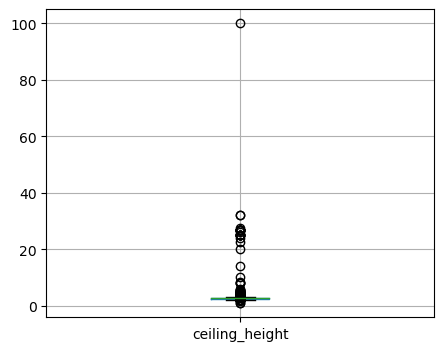

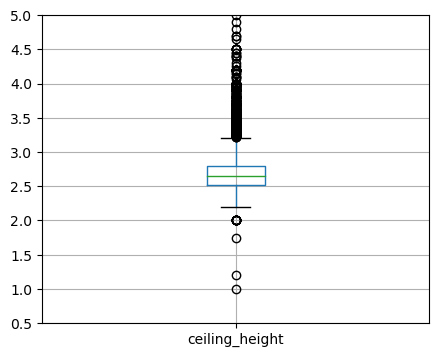

In [17]:
# Before filling in the missing values in ceiling_height, we will check the data for outliers.
# We will plot a boxplot and then set an interval on the Y-axis for better visualization of the quartile values.
df.boxplot(column='ceiling_height', figsize=(5, 4))
plt.show()
df.boxplot(column='ceiling_height', figsize=(5, 4))
plt.ylim(0.5, 5)
plt.show()

In [18]:
df['ceiling_height'].median()

2.65

The graph shows outliers up to 100 meters upwards and down to 1 meter downwards, which clearly do not correspond to reality and fall outside the interquartile range. The median is 2.65 meters.

We will fill the following with the median value:
- Missing values,
- Values exceeding 4.5 meters,
- Values less than 2 meters.

In [19]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df.loc[(df['ceiling_height'] < 2) | (df['ceiling_height'] > 4.5), 'ceiling_height'] = df['ceiling_height'].median()

In [20]:
# Explore the values in the columns for outliers by using the .describe() method
# We are interested in the standard deviation (std) value, which shows how much 
# the values in the sample deviate from the mean
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.078436,2.695395,10.669852,34.312885,5.893277,0.002114,10.449893,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,169.222748
std,5.682278,1.089640e+07,35.661808,1.066393,0.212805,6.583725,21.708644,4.883317,0.045932,5.639181,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,206.550577
min,0.000000,1.219000e+04,12.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,0.000000,7.300000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,0.000000,9.040000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,0.000000,11.500000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.500000,60.000000,409.700000,33.000000,1.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


A large spread of values will be present in those columns where the standard deviation (std) significantly exceeds the mean values.

Columns with small deviation (no, almost no, or few outliers) are:
- floor
- parks_around3000
- ponds_around3000
- ponds_nearest

Columns with outliers not extremely exceeding the average:
- total_images - 5.7 compared to 9
- rooms
- floors_total - there are 2 outliers - 60 and about 52 floors - acceptable and plausible
- balcony - maximum of 5 balconies - plausible
- airports_nearest - relatively few outliers
- parks_nearest - quite a few outliers, but hard to call them extreme

Columns with extreme outliers:
- last_price - there are very expensive apartments in the sample
- total_area - significant deviation
- ceiling_height - discussed above
- living_area
- kitchen_area
- cityCenters_nearest - unlike the distance to the airport, there are significantly more outliers here
- days_exposition

We will deal with the columns containing extreme outliers during further processing and analysis.

In [21]:
# Let's check the dataset for missing values once more
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

All missing values in the columns have been handled, except for those where we decided to leave them. We will address the missing values in cityCenters_nearest after removing implicit duplicates in locality_name.

In [22]:
# The first_day_exposition column contains date information.
# We will change the values in this column to the datetime type.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
# Let's review the changes
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,0,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,0,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0


In [24]:
# We will check for explicit duplicates
df.duplicated().sum()

0

There are no explicit duplicates.

In [25]:
# We will check the values in the locality_name column for implicit duplicates
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [26]:
# The number of unique values
len(df['locality_name'].sort_values().unique())

364

Before examining the values for duplicates, let's add a column adm_type to record the type of administrative division. This will be useful when filling in the missing values in the column for the distance to the center.

In [27]:
def adm_type(row):
    if 'коттеджный' in row:
        return 'поселок'
    elif 'село' in row or 'деревня' in row:
        return 'село'
    elif 'товарищество' in row:
        return 'село'
    elif 'поселок' in row or 'посёлок' in row:
        return 'поселок'
    else:
        return 'город'
df['adm_type'] = df['locality_name'].apply(adm_type)

In [28]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,adm_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0,город
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,0,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,поселок
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,0,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,город
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,0,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,город
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,город


In the Russian writing of settlement types, there are duplicates: "е", "ё", word rearrangements, different sets of words. It makes sense to remove the name of the administrative unit (village, settlement), leaving only the name of the locality.

In [29]:
wrong_list = ['городской поселок ', 'городской посёлок ', 'деревня ', 'коттеджный поселок ', \
              'коттеджный посёлок ', 'поселок ', 'посёлок ', 'поселок городского типа ', 'посёлок городского типа ', \
              'поселок станции ', 'посёлок станции ', 'посёлок при железнодорожной станции ', \
              'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село ', 'городского типа ', \
              'при железнодорожной станции ', 'станции ']
for i in wrong_list:
    df['locality_name'] = df['locality_name'].str.replace(i,'')

In [30]:
# We will recheck the values
df['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [31]:
# The number of unique values
len(df['locality_name'].sort_values().unique())

305

In [32]:
# We will fill the missing values in locality_name with the median values,
# grouping by the type of administrative division.
for t in df['adm_type'].unique():
    df.loc[(df['adm_type'] == t) & (df['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    df.loc[(df['adm_type'] == t), 'cityCenters_nearest'].median()

In [33]:
# Let's verify the filling
df['locality_name'].isna().sum()

0

The number of unique values has decreased from 364 to 305.

**Interim Conclusion**

Missing values in the data have been filled.

Extreme outlier values have been addressed.

Implicit duplicates in the names of localities have been eliminated.

The data contains many missing values, likely because the person posting the advertisement did not fill them in. This is not critical, but to minimize missing values, certain fields could be made mandatory, and a limited list of options could be provided in a dropdown menu where necessary or possible.

It would also be advisable to establish an autofill assistant for the locality field to minimize the variation in the spelling of administrative unit names.

## Data Enrichment

In [34]:
# We will add a new column to the table with the price per square meter.
df['price_one_meter'] = df['last_price'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,adm_type,price_one_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95.0,город,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,0,...,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,поселок,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,0,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,город,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,0,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,город,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,город,100000.000000


In [35]:
# We will add a new column to the table with the day of the week when the advertisement was published
# (0 — Monday, 1 — Tuesday, and so on)
df['day_exposition'] = df['first_day_exposition'].dt.weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,adm_type,price_one_meter,day_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,18863.0,16028.0,1,482.0,2,755.0,95.0,город,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,0,...,12817.0,18603.0,0,NaN,0,NaN,81.0,поселок,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,0,...,21741.0,13933.0,1,90.0,2,574.0,558.0,город,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,0,...,28098.0,6800.0,2,84.0,3,234.0,424.0,город,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,31856.0,8098.0,2,112.0,1,48.0,121.0,город,100000.000000,1


In [36]:
# Let's add new columns to the table with the month and year of the advertisement's publication
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,adm_type,price_one_meter,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,1,482.0,2,755.0,95.0,город,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,0,...,0,NaN,0,NaN,81.0,поселок,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,0,...,1,90.0,2,574.0,558.0,город,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,0,...,2,84.0,3,234.0,424.0,город,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,2,112.0,1,48.0,121.0,город,100000.000000,1,6,2018


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  int32         
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

In [38]:
# Let's add a column with the type of floor for the apartment
#(values — «первый» means "first", «последний» means "last", «другой» means "other")
type_floor = []
for i ,j in zip(df['floor'], df['floors_total']):
    if i == 1:
        type_floor.append('первый')
    elif i == j:
        type_floor.append('последний')
    else:
        type_floor.append('другой')
df['type_floor'] = type_floor
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,adm_type,price_one_meter,day_exposition,month_exposition,year_exposition,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,482.0,2,755.0,95.0,город,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,0,...,NaN,0,NaN,81.0,поселок,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,0,...,90.0,2,574.0,558.0,город,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,0,...,84.0,3,234.0,424.0,город,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,112.0,1,48.0,121.0,город,100000.000000,1,6,2018,другой


In [39]:
# Let's add a column to record the distance to the city center in kilometers (rounded to whole numbers)
df['cityCenters_km'] = round(df['cityCenters_nearest']/1000).astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,adm_type,price_one_meter,day_exposition,month_exposition,year_exposition,type_floor,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,2,755.0,95.0,город,120370.370370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,0,...,0,NaN,81.0,поселок,82920.792079,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,0,...,2,574.0,558.0,город,92785.714286,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,0,...,3,234.0,424.0,город,408176.100629,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,1,48.0,121.0,город,100000.000000,1,6,2018,другой,8


## Exploratory Data Analysis

Let's examine the following parameters of the properties in more detail:
- total area;
- living area;
- kitchen area;
- price of the property;
- number of rooms;
- type of floor ("first", "last", "other");
- distance to the city center in meters;
- day and month of the advertisement's publication.

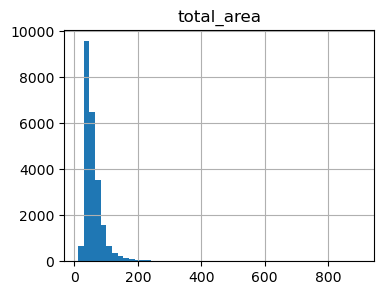

In [40]:
# Let's create a histogram for 'total_area'
df['total_area'].hist(bins=50, figsize=(4, 3))
plt.title('total_area')
plt.show()

There is a visible long right tail, indicating that a few or one apartment has a significantly larger area than the majority (around 900). Let's create a boxplot to examine the spread.

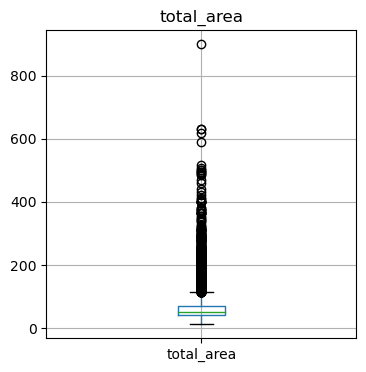

In [41]:
df.boxplot(column='total_area', figsize=(4, 4))
plt.title('total_area')
plt.show()

Indeed, there are large apartments over 200 sq.m., with one being 900 sq.m. Let's focus on the majority of apartments, up to 200 sq.m.

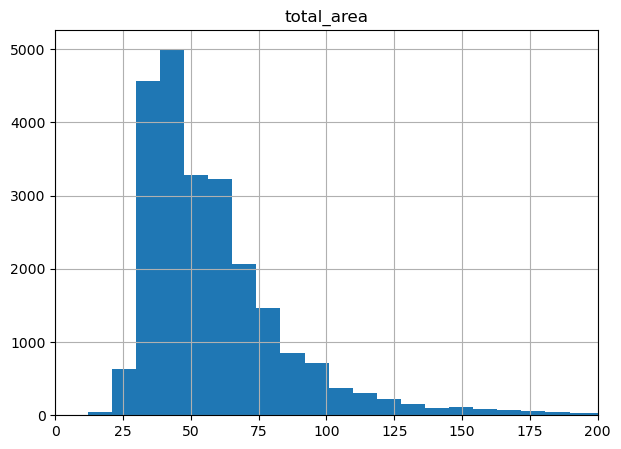

In [42]:
df['total_area'].hist(bins=100, figsize=(7, 5))
plt.title('total_area')
plt.xlim(0, 200)
plt.show()

So, most apartments in the sample range from 30 to 75 sq.m. The number of apartments between 30 and 50 sq.m. is predominant. There are also large apartments, mostly ranging from 100 to 550 sq.m., with a few around 600 sq.m., and one instance of 900 sq.m.

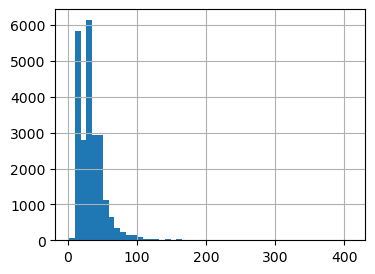

In [43]:
# Let's create a histogram for 'living_area'
df['living_area'].hist(bins=50, figsize=(4, 3))
plt.show()

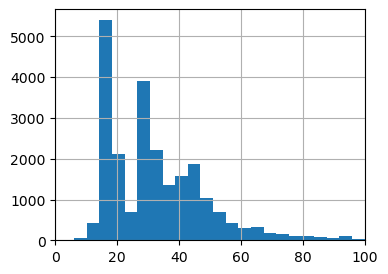

In [44]:
df['living_area'].hist(bins=100, figsize=(4, 3))
plt.xlim(0, 100)
plt.show()

The range of values for the living area extends up to 400 sq.m. The majority of apartments have a living area up to 60-70 sq.m. There are clear peaks in the number of apartments with living areas between 15 and 20 sq.m. and around 30 sq.m.

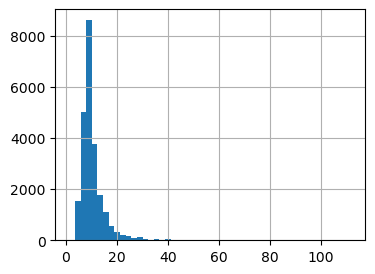

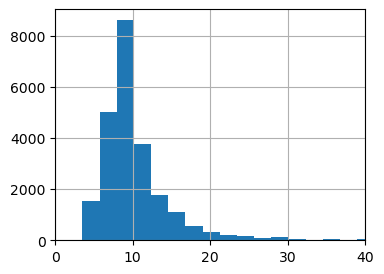

In [45]:
# Let's create a histogram for 'kitchen_area/
df['kitchen_area'].hist(bins=50, figsize=(4, 3))
plt.show()
df['kitchen_area'].hist(bins=50, figsize=(4, 3))
plt.xlim(0, 40)
plt.show()

Despite a few instances with kitchen areas up to 100 sq.m., the majority of apartments have kitchen areas ranging from 7 to 12 sq.m.

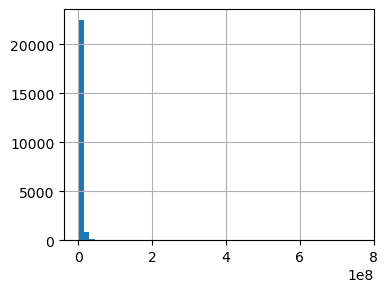

In [46]:
# Let's create a histogram for 'last_price'
df['last_price'].hist(bins=50, figsize=(4, 3))
plt.show()

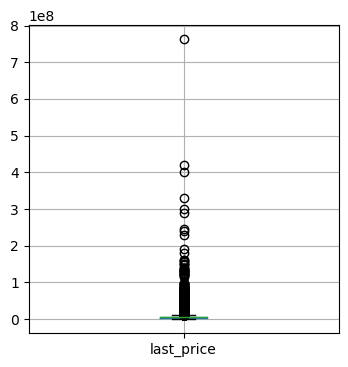

In [47]:
df.boxplot(column='last_price', figsize=(4, 4))
plt.show()

In [48]:
df['last_price'].sort_values(ascending=False).head(10)

12950    763000000.0
19505    420000000.0
14681    401300000.0
1435     330000000.0
15626    300000000.0
22784    289238400.0
16434    245000000.0
13726    240000000.0
5883     230000000.0
8885     190870000.0
Name: last_price, dtype: float64

There is an apartment in the list that clearly stands out with an unusually low price.

In [49]:
df[df['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,adm_type,price_one_meter,day_exposition,month_exposition,year_exposition,type_floor,cityCenters_km
8778,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,0,...,0,NaN,8.0,город,111.834862,2,3,2019,последний,9


The price for the 109 sq.m. apartment is clearly understated. It seems the amount is indicated in thousands. Let's correct the data.

In [50]:
df.loc[[8778], ['last_price']] = df.loc[[8778], ['last_price']]*1000

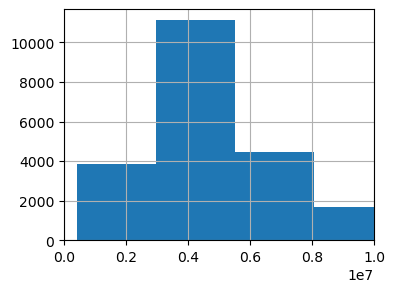

In [51]:
df['last_price'].hist(bins=300, figsize=(4, 3))
plt.xlim(0, 10000000)
plt.show()

The price for most apartments falls within the range of up to 10 million rubles, with a predominance of prices between 2.5 and 5 million. There are also a few expensive apartments, with the majority concentrated up to 200 million, a few up to 400 million, and a single property priced at 763 million

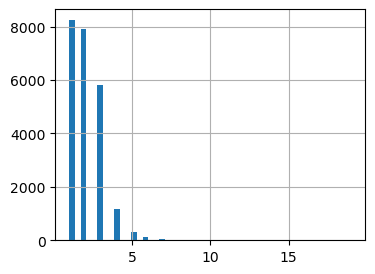

In [52]:
# Let's create a histogram for 'rooms'
df['rooms'].hist(bins=50, figsize=(4, 3))
plt.show()

There are apartments with up to 19 rooms, but most listings feature 1, 2, and 3-room apartments.

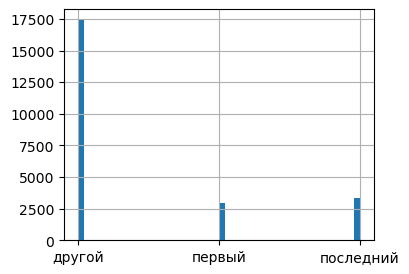

In [53]:
# Let's create a histogram for 'type_floor'
df['type_floor'].hist(bins=50, figsize=(4, 3))
plt.show()

The number of apartments on the first and last floors is almost the same, with a slight predominance of the last floors. The majority of properties fall under the "other" floor type.

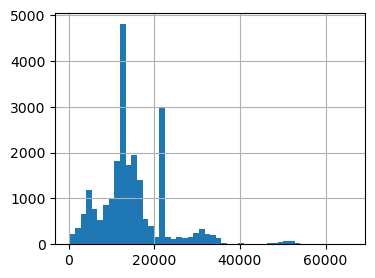

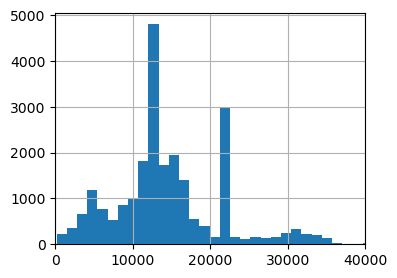

In [54]:
# Let's create a histogram for 'cityCenters_nearest'
df['cityCenters_nearest'].hist(bins=50, figsize=(4, 3))
plt.show()
df['cityCenters_nearest'].hist(bins=50, figsize=(4, 3))
plt.xlim(0, 40000)
plt.show()

Most apartments are located at a distance of 10,000 to 15,000 meters from the city center.

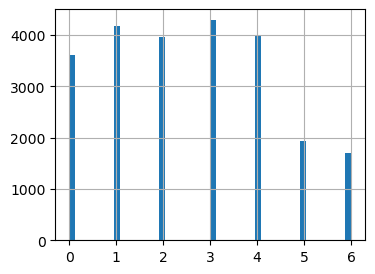

In [55]:
# Let's create a histogram for 'day_exposition'
df['day_exposition'].hist(bins=50, figsize=(4, 3))
plt.show()

The fewest advertisements are posted on Saturdays and Sundays.

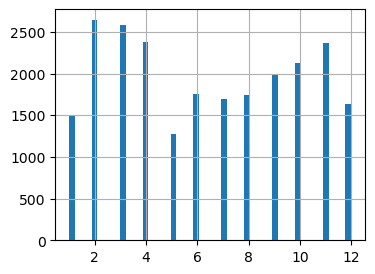

In [56]:
# Let's create a histogram for 'month_exposition'
df['month_exposition'].hist(bins=50, figsize=(4, 3))
plt.show()

May, January, and December have the least activity in terms of posting advertisements. Late winter and early spring, as well as autumn, are the times with the highest number of advertisements being posted.

**Let's examine how quickly the apartments were sold.**

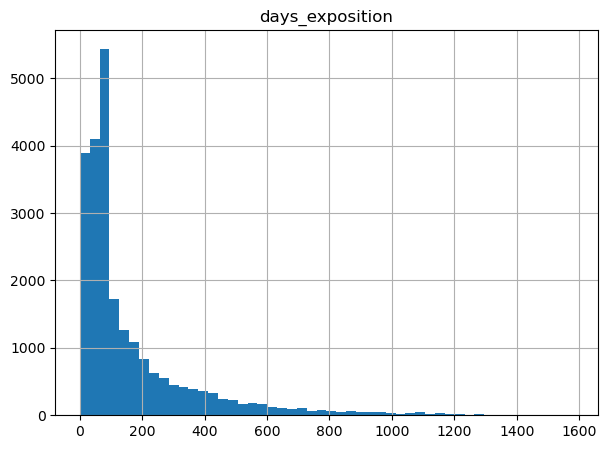

In [57]:
df['days_exposition'].hist(bins=50, figsize=(7, 5))
plt.title('days_exposition')
plt.show()

There are a few instances of very long sales, up to around 1600 days.

However, there is also a peak in sales around 100 days. Let's examine this peak in more detail.

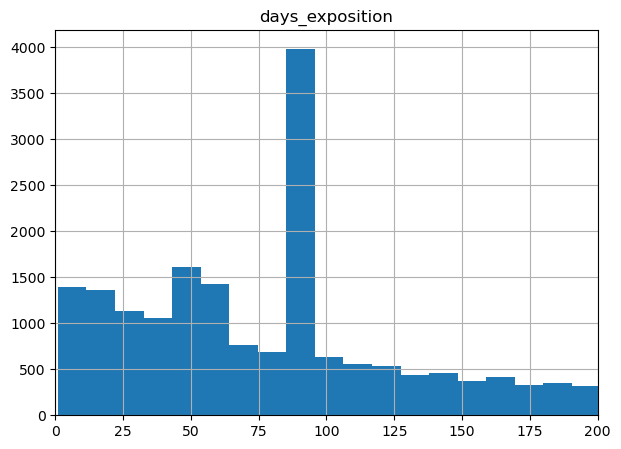

In [58]:
df['days_exposition'].hist(bins=150, figsize=(7, 5))
plt.title('days_exposition')
plt.xlim(0, 200)
plt.show()

An interesting feature: the number of apartments sold at the listing duration of 85-90 days sharply increases, approximately fourfold. After this, it returns to the previous trend. Around 16% of the entire sample is sold at 85-90 days.

There is also a noticeable, but less pronounced, increase in the number of apartments sold at 50-60 days.

After consulting with technical specialists, it was found that on these days, the system removes free listings from display.

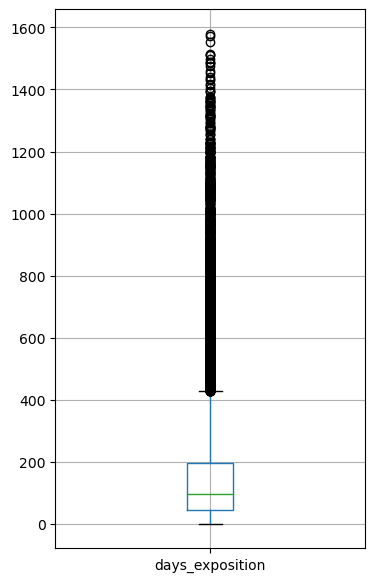

In [59]:
df.boxplot(column='days_exposition', figsize=(4, 7))
plt.show()

In [60]:
df['days_exposition'].describe()

count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Most apartments are sold within 100 days. This is evident from the histogram, and the median confirms it. The average time of 169 days is influenced by longer durations (maximum of 1580 days).

- Sales within 45 days can be considered quick.
- Sales over 198 days can be considered long.
- Sales over 400 days can be considered unusually long.

**Let's examine whether the price depends on:**
- total area
- living space
- kitchen areas
- number of rooms
- the floor on which the apartment is located (first, last, other)
- dates of placement (day of the week, month, year)

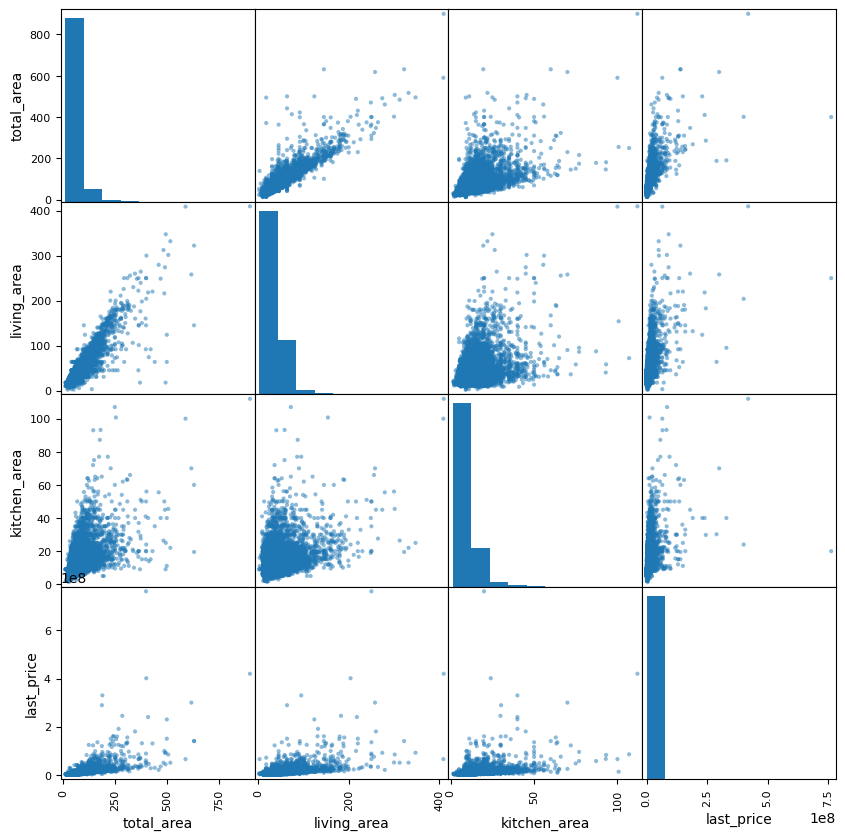

In [61]:
# Let's build a matrix based on the values of the area of the premises in the apartment
pd.plotting.scatter_matrix(df.loc[:, ['total_area', 'living_area', 'kitchen_area', 'last_price']], figsize=(10, 10))
plt.show()

In [62]:
def cor (value):
    return df[value].corr(df['last_price'])
values = ['total_area', 'living_area', 'kitchen_area']
for i in values:
    print('The correlation for', i, 'with last_price is:', cor(i))

The correlation for total_area with last_price is: 0.6538086421356286
The correlation for living_area with last_price is: 0.5561388951781775
The correlation for kitchen_area with last_price is: 0.45429038718910963


Visually, there is a slight correlation between total_area and the price. The higher the area, the higher the cost.

However, the living area (living_area) has less effect on the cost, and the kitchen area even shows some negative correlation.

In [63]:
df1 = df.loc[df['total_area'] < 100, ['total_area', 'living_area', 'kitchen_area', 'last_price']]
def cor (value):
    return df1[value].corr(df1['last_price'])
values = ['total_area', 'living_area', 'kitchen_area']
for i in values:
    print('The correlation for', i, 'with last_price is:', cor(i))

The correlation for total_area with last_price is: 0.6495975285089605
The correlation for living_area with last_price is: 0.4845213403531195
The correlation for kitchen_area with last_price is: 0.47439251892815293


Если предварительно отфильтровать квартиры по значению общей площади меньше 100, то также будет заметно, что что с ценой больше корлиррует общая жилая площадь.

Таким образом, цена в большей степени зависит от общей площади, в то время как увеличение площади кухни или жилой площади не влияет на увеличение стоимости квартиры.

In [64]:
# Let's see if the price depends on the number of rooms
df.groupby('rooms')['last_price'].agg(['count', 'median', 'mean']).sort_values('median')

,count,median,mean
rooms,,,
1,8233,3585000.0,3.822203e+06
2,7924,4772669.0,5.592164e+06
3,5797,6200000.0,8.181798e+06
4,1175,9000000.0,1.343185e+07
5,326,14000000.0,2.376208e+07
6,105,19000000.0,3.170975e+07
10,3,23000000.0,2.616667e+07
8,12,23095000.0,5.022417e+07
9,8,23750000.0,3.415236e+07


The dependence of the median price on the number of rooms is visible. The more rooms, the higher the price.

In [65]:
# Let's see if the price depends on the floor where the apartment is located (first, last, other)
df.groupby('type_floor')['last_price'].agg(['count', 'median']).sort_values('median')

,count,median
type_floor,,
первый,2912,3900000.0
последний,3335,4300000.0
другой,17403,4850000.0


Медиана цена на первом этаже ниже, так же менее ценятся квартиры на последних этажах.

In [66]:
# Let's see if the price depends on the date of placement (day of the week, month, year)
df.groupby('day_exposition')['last_price'].agg(['count', 'median']).sort_values('median')

,count,median
day_exposition,,
6,1692,4550000.0
5,1933,4575000.0
4,3992,4577500.0
0,3606,4650000.0
3,4286,4650000.0
2,3966,4700000.0
1,4175,4720000.0


Surprisingly, the price is higher if the ad is placed on Monday-Tuesday and lower if on weekends.

In [67]:
df.groupby('month_exposition')['last_price'].agg(['count', 'median']).sort_values('median')

,count,median
month_exposition,,
6,1755,4400000.0
5,1270,4500000.0
10,2124,4560000.0
8,1742,4570000.0
1,1491,4600000.0
2,2639,4650000.0
7,1690,4650000.0
3,2582,4660000.0
12,1638,4695000.0


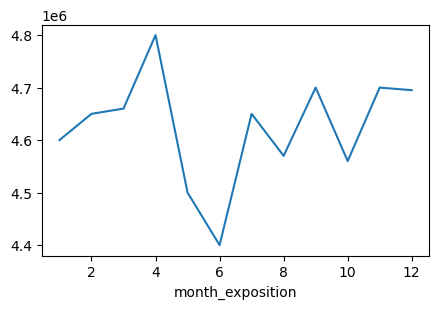

In [68]:
df.groupby('month_exposition')['last_price'].median().plot(figsize=(5, 3))
plt.show()

The price is significantly lower if the ad is placed in May-June.

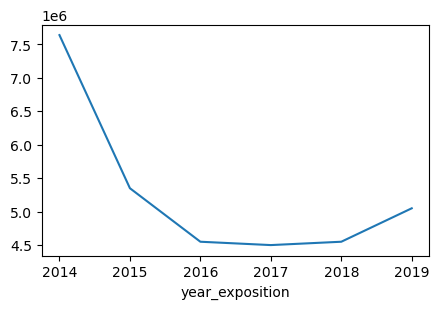

In [69]:
df.groupby('year_exposition')['last_price'].median().plot(figsize=(5, 3))
plt.show()

Until 2016, the median cost of apartments was decreasing. From 2016 to 2018, the price practically did not change, and in 2019 there was an increase.

**Let's calculate the average price per square meter in 10 localities with the largest number of ads and select the localities with the highest and lowest cost per square meter.**

In [70]:
df3 = df.groupby('locality_name')['price_one_meter'].agg(['count', 'mean']).sort_values('count', ascending=False).head(10)
df3

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794
Мурино,590,86087.512050
Кудрово,472,95324.930544
Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
Парголово,327,90175.913458
Гатчина,307,68746.146763


In [71]:
df3.sort_values('mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794
Пушкин,369,103125.819291
Кудрово,472,95324.930544
Парголово,327,90175.913458
Мурино,590,86087.512050
Шушары,440,78677.364217
Колпино,338,75424.579098
Гатчина,307,68746.146763
Всеволожск,398,68654.473986


The locality with the highest average cost per sq.m. is St. Petersburg, with the lowest cost is Vyborg.

**Let's select apartments in St. Petersburg and calculate the average price of each kilometer.
Let's determine how the cost of the objects depends on the distance to the city center.**

In [72]:
price_km_spb = df.loc[df['locality_name'] == 'Санкт-Петербург']
price_km_spb = price_km_spb.loc[:, ['last_price', 'cityCenters_km']]
price_km_spb['price_km_spb'] = price_km_spb['last_price'] / price_km_spb['cityCenters_km']
price_km_spb.head()

,last_price,cityCenters_km,price_km_spb
0,13000000.0,16,8.125000e+05
2,5196000.0,14,3.711429e+05
3,64900000.0,7,9.271429e+06
4,10000000.0,8,1.250000e+06
7,7915000.0,12,6.595833e+05


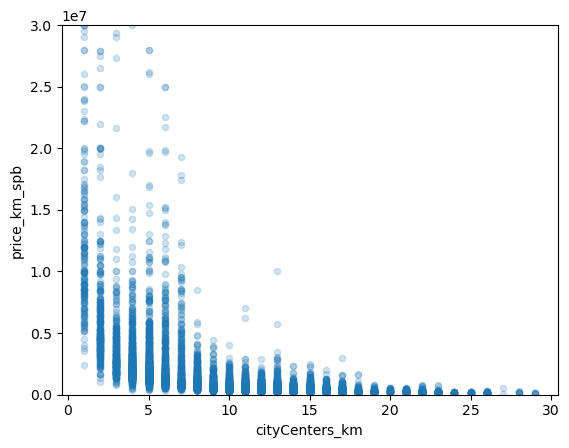

In [73]:
price_km_spb.plot(x='cityCenters_km', y='price_km_spb', kind='scatter', alpha=0.2)
plt.ylim(0, 30000000)
plt.show()

The closer to the center of St. Petersburg, the higher the cost per kilometer.

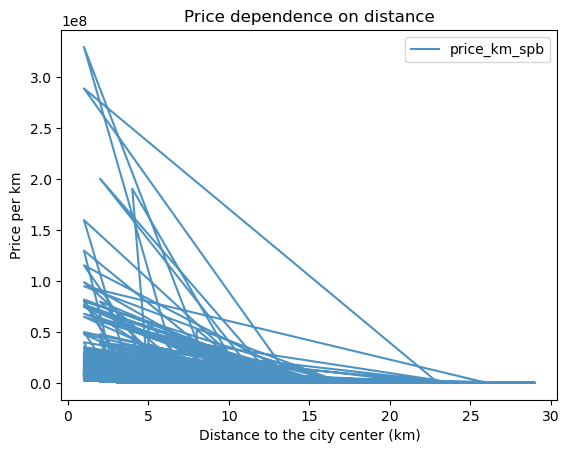

In [74]:
price_km_spb.plot(x='cityCenters_km', y='price_km_spb', kind='line', alpha=0.8)
plt.xlabel('Distance to the city center (km)')
plt.ylabel('Price per km')
plt.title('Price dependence on distance')
plt.show()

The graph of many lines is hard to read, let's fix it.

In [75]:
# We aggregate the data to get the average price values for each distance
# We assume that 'price_km_spb' contains several values for the same distance
aggregated_data = price_km_spb.groupby('cityCenters_km').agg({'price_km_spb': 'mean'}).reset_index()

In [76]:
# Let's sort the data by distance
aggregated_data = aggregated_data.sort_values(by='cityCenters_km')

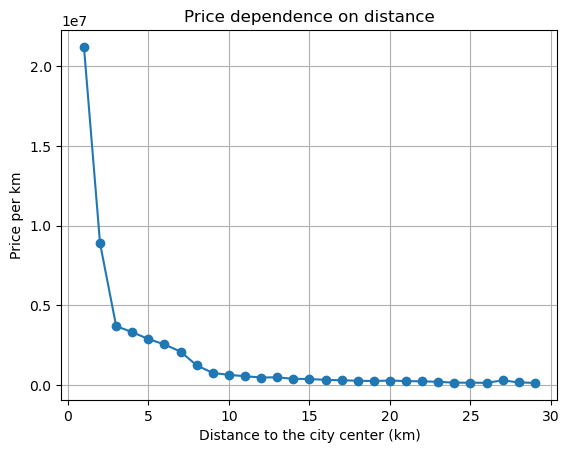

In [77]:
# Let's build a graph from one line
plt.plot(aggregated_data['cityCenters_km'], aggregated_data['price_km_spb'], marker='o', linestyle='-')
plt.xlabel('Distance to the city center (km)')
plt.ylabel('Price per km')
plt.title('Price dependence on distance')
plt.grid(True)
plt.show()

## Conclusion

**Regarding the value of the data**
- Most apartments in Vyborg range from 30 to 75 sq.m. The number of apartments from 30 to 50 sq.m. prevails.
- The price of most apartments falls in the range of up to 10 million rubles. with prices prevailing from 2.5 to 5 million rubles.
- Mostly 1, 2 and 3-room apartments appear in the ads.
- The number of apartments on the first and last floors is almost the same with a slight predominance of the last floors. The bulk of the objects belong to the type of floor "other."
- Most of the apartments are located at a distance of 10 to 15 thousand meters from the city center.
- Fewer ads are placed on Saturdays and Sundays. At the same time, in May, January and December, there is the least activity in placing ads. The end of winter and the beginning of spring, as well as autumn, are the times of the greatest publication activity.
- Most of the apartments are sold within 100 days. Sales within 45 days can be called fast.

**Regarding the impact on the cost**

The price of the apartment depends more on:
- the total area
- number of rooms
- distance to the city center
- floors (the first and last are valued less).
The cost is also affected by the date of publication of the announcement (the weekend price decreases, the beginning of the week increases) and the time of year (late spring, early summer - the cost is lower).

**Regarding data quality**

There are a lot of missing values in the data for the probable reason that they were not filled in by the person publishing the ad. It's not critical. but to minimize omissions, it would be possible to make a number of fields mandatory, and enter a limited list of options to select from the drop-down list where necessary/possible.

It is also advisable to install a filter assistant for filling in a locality to minimize the spread of spelling options for the name of an administrative unit.

**The checklist**

- [x] files have been studied (the first lines, the `info()` method, histograms, etc. are output)
- [x] missing values have been determined
- [x] filled in missing values where possible with explanations
- [x] data types have been changed with an explanation of which columns the types have been changed and why
- [x] eliminated implicit duplicates
- [x] eliminated rare and outlier values (anomalies) in all columns
- [x] calculated values have been added to the table
- [x] the parameters have been studied and described
- [x] histograms are plotted for each parameter
- [x] intermediate conclusions are drawn at each stage
- [x] the general conclusion is made